## 1. Importar las librerias

In [147]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

## 2. Cargar las bases de datos

In [148]:
mdata = pd.read_csv("macrodata.csv")

In [151]:
mdata

,Unnamed: 0,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,3/31/1959,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,6/30/1959,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,9/30/1959,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,12/31/1959,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,3/31/1960,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,9/30/2008,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,12/31/2008,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,3/31/2009,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,6/30/2009,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


## 3. Seleccionar las variables que vamos a pronosticar

In [155]:
mata = mdata[['realgdp','realcons','realinv',"realgovt"]]

<Axes: >

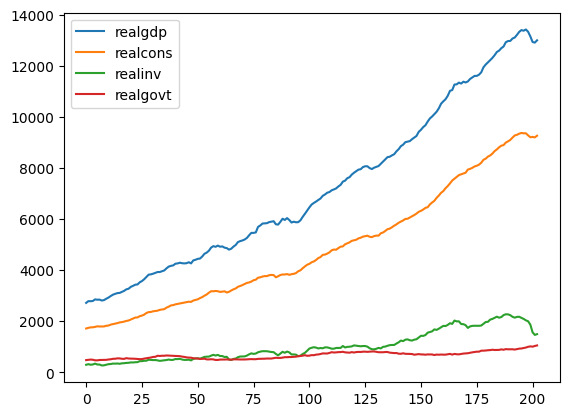

In [156]:
mata.plot()

## 4. Aplicar la prueba de ***causalidad*** de Clive Granger

Vamos a aplicar la prueba de causalidad utilizando 10 rezagos a los datos originales

¡Me interesa que los p-value sean menores a 0.05 existe una relacion de causalidad entre las variables!

In [157]:
# Vamos a hacer un test de causalidad de Granger
# Vamos a estudiar el comovimiento o cointegración de las variables
# Hipotesis nula la segunda no es cusa de la primera

from statsmodels.tsa.stattools import grangercausalitytests

data = mdata[["realgdp", "realinv"]]
gc_res = grangercausalitytests(data, 10)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7877  , p=0.0966  , df_denom=199, df_num=1
ssr based chi2 test:   chi2=2.8297  , p=0.0925  , df=1
likelihood ratio test: chi2=2.8101  , p=0.0937  , df=1
parameter F test:         F=2.7877  , p=0.0966  , df_denom=199, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2335  , p=0.7920  , df_denom=196, df_num=2
ssr based chi2 test:   chi2=0.4789  , p=0.7871  , df=2
likelihood ratio test: chi2=0.4783  , p=0.7873  , df=2
parameter F test:         F=0.2335  , p=0.7920  , df_denom=196, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4273  , p=0.2361  , df_denom=193, df_num=3
ssr based chi2 test:   chi2=4.4371  , p=0.2180  , df=3
likelihood ratio test: chi2=4.3886  , p=0.2224  , df=3
parameter F test:         F=1.4273  , p=0.2361  , df_denom=193, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.1535  , p=0.3328  

Tenemos series inestables sobre las cuales no podemos dar una explicacion clara sobre la causalidad

En el siguiente ejemplo: los pvalue ***en el rezago 1*** son superiores a 0.05 rechazo la hipotesis nula esto significa que sí hay una causalidad entre consumption y gdp

In [159]:
from statsmodels.tsa.stattools import grangercausalitytests

data = mdata[["realgdp", "realcons"]]
gc_res = grangercausalitytests(data, 10)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1851  , p=0.6675  , df_denom=199, df_num=1
ssr based chi2 test:   chi2=0.1879  , p=0.6646  , df=1
likelihood ratio test: chi2=0.1878  , p=0.6647  , df=1
parameter F test:         F=0.1851  , p=0.6675  , df_denom=199, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=22.9218 , p=0.0000  , df_denom=196, df_num=2
ssr based chi2 test:   chi2=47.0132 , p=0.0000  , df=2
likelihood ratio test: chi2=42.2456 , p=0.0000  , df=2
parameter F test:         F=22.9218 , p=0.0000  , df_denom=196, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=20.8505 , p=0.0000  , df_denom=193, df_num=3
ssr based chi2 test:   chi2=64.8202 , p=0.0000  , df=3
likelihood ratio test: chi2=56.1467 , p=0.0000  , df=3
parameter F test:         F=20.8505 , p=0.0000  , df_denom=193, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=16.8883 , p=0.0000  

## 5. Estabilicemos las series (sacando las primeras diferencias)

In [160]:
mata_difference = mata.diff()
mata_difference

,realgdp,realcons,realinv,realgovt
0,NaN,NaN,NaN,NaN
1,68.452,26.3,23.961,11.256
2,-3.313,18.1,-21.633,9.959
3,9.716,1.9,10.130,-7.208
4,62.495,16.8,32.366,-21.853
...,...,...,...,...
198,-90.666,-83.3,-35.825,30.271
199,-182.680,-72.4,-133.032,15.722
200,-216.510,13.9,-299.167,-10.986
201,-23.906,-20.2,-101.816,27.241


Las siguietes pruebas evaluan la estabilidad de las series originales

In [ ]:
from statsmodels.tsa.stattools import adfuller
prueba_estabilidad=adfuller(mata["realgdp"],autolag="AIC")
print("P-Value: ",prueba_estabilidad[1])

P-Value:  0.9982455372335032


In [ ]:
from statsmodels.tsa.stattools import adfuller
prueba_estabilidad=adfuller(mata["realinv"],autolag="AIC")
print("P-Value: ",prueba_estabilidad[1])

P-Value:  0.6484956579101143


In [162]:
from statsmodels.tsa.stattools import adfuller
prueba_estabilidad=adfuller(mata["realcons"],autolag="AIC")
print("P-Value: ",prueba_estabilidad[1])

P-Value:  0.9976992503412904


Las siguientes pruebas evaluan la estabilidad de las primeras diferencias

In [ ]:
from statsmodels.tsa.stattools import adfuller
prueba_estabilidad=adfuller(mata_difference["realgdp"].dropna(),autolag="AIC")
print("P-Value: ",prueba_estabilidad[1])

P-Value:  3.327882187668224e-08


In [ ]:
from statsmodels.tsa.stattools import adfuller
prueba_estabilidad=adfuller(mata_difference["realinv"].dropna(),autolag="AIC")
print("P-Value: ",prueba_estabilidad[1])

P-Value:  4.297932808177072e-06


In [161]:
from statsmodels.tsa.stattools import adfuller
prueba_estabilidad=adfuller(mata_difference["realcons"].dropna(),autolag="AIC")
print("P-Value: ",prueba_estabilidad[1])

P-Value:  0.0006479282158627571


## 6. Aplicamos el test de Granger a la base con diferencias

In [163]:
data = mata_difference[["realgdp", "realinv","realcons"]].dropna()

In [164]:
# Vamos a hacer un test de causalidad de Granger
# Vamos a estudiar el comovimiento o cointegración de las variables
# Hipotesis nula la segunda no es cusa de la primera

from statsmodels.tsa.stattools import grangercausalitytests

data = mata_difference[["realgdp", "realinv"]].dropna()
gc_res = grangercausalitytests(data, 12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1842  , p=0.2778  , df_denom=198, df_num=1
ssr based chi2 test:   chi2=1.2021  , p=0.2729  , df=1
likelihood ratio test: chi2=1.1985  , p=0.2736  , df=1
parameter F test:         F=1.1842  , p=0.2778  , df_denom=198, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.0684  , p=0.1292  , df_denom=195, df_num=2
ssr based chi2 test:   chi2=4.2429  , p=0.1199  , df=2
likelihood ratio test: chi2=4.1985  , p=0.1225  , df=2
parameter F test:         F=2.0684  , p=0.1292  , df_denom=195, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.6174  , p=0.1867  , df_denom=192, df_num=3
ssr based chi2 test:   chi2=5.0290  , p=0.1697  , df=3
likelihood ratio test: chi2=4.9665  , p=0.1743  , df=3
parameter F test:         F=1.6174  , p=0.1867  , df_denom=192, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.5712  , p=0.1836  

In [165]:
from statsmodels.tsa.stattools import grangercausalitytests

data = mata_difference[["realgdp", "realcons"]].dropna()
gc_res = grangercausalitytests(data, 12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=47.7717 , p=0.0000  , df_denom=198, df_num=1
ssr based chi2 test:   chi2=48.4955 , p=0.0000  , df=1
likelihood ratio test: chi2=43.4434 , p=0.0000  , df=1
parameter F test:         F=47.7717 , p=0.0000  , df_denom=198, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=29.0562 , p=0.0000  , df_denom=195, df_num=2
ssr based chi2 test:   chi2=59.6024 , p=0.0000  , df=2
likelihood ratio test: chi2=52.1667 , p=0.0000  , df=2
parameter F test:         F=29.0562 , p=0.0000  , df_denom=195, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=20.9690 , p=0.0000  , df_denom=192, df_num=3
ssr based chi2 test:   chi2=65.2006 , p=0.0000  , df=3
likelihood ratio test: chi2=56.3974 , p=0.0000  , df=3
parameter F test:         F=20.9690 , p=0.0000  , df_denom=192, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=15.6002 , p=0.0000  

**CONCLUSION: Si los p-value estan por debajo de 0.05 entonces rechazo la hipotesis nula como la hipotesis nula es que no hay causalidad entonces esto significa que sí la hay osea que el consumo efectivamente causa el GDP**

lAS VARIABLES QUE SE INFLUENCIAN ENTRE SI SON AQUELLAS PARA LAS CUALES EL P VALUE DE SUS DIFERENCIAS ES MENOR QUE O.O5 PORJEMPLO SI EL PVALUE DE SUS DIFERENCIAS ES MAYOR QUE 0.05 ESAS VARIABLES NO ESTAN MUTUAMENTE INFLUENCIADAS

## 7. IMPLEMENTAMOS EL VAR

In [167]:
data = mata_difference[["realgdp","realcons"]].dropna()

In [169]:
data

,realgdp,realcons
1,68.452,26.3
2,-3.313,18.1
3,9.716,1.9
4,62.495,16.8
5,-13.309,22.4
...,...,...
198,-90.666,-83.3
199,-182.680,-72.4
200,-216.510,13.9
201,-23.906,-20.2


In [172]:
# Hacemos un loop del VAR sobre cada uno de los rezagos teniendo en cuenta
# el AIC Akaike information criterion y BIC Bayesian Information Criterion
# Buscamos el rezago desde el cual se estabilizan los AIC y BIC
# El punto desde el que se estabilizan es el orden del VAR

for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    model = VAR(data)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  14.272876892440745
BIC:  14.371483009099226

Order = 2
AIC:  14.213180709183339
BIC:  14.37809657751074

Order = 3
AIC:  14.119807734108955
BIC:  14.35149752077299

Order = 4
AIC:  14.156579351016811
BIC:  14.455512717443588

Order = 5
AIC:  14.173665974828616
BIC:  14.54031816788565

Order = 6
AIC:  14.210442867145234
BIC:  14.645294811737038

Order = 7
AIC:  14.229506357511353
BIC:  14.733044751136545

Order = 8
AIC:  14.245114992542092
BIC:  14.817832401862468

Order = 9
AIC:  14.254312009436044
BIC:  14.896706968909545

Order = 10
AIC:  14.276273042528299
BIC:  14.988850155159376

Order = 11
AIC:  14.301266680713782
BIC:  15.084536720976322

Order = 12
AIC:  14.283774636686747
BIC:  15.138254655676349

Order = 13
AIC:  14.307009599692256
BIC:  15.233223032566439

Order = 14
AIC:  14.326866393860504
BIC:  15.32534316962719

Order = 15
AIC:  14.356474777876738
BIC:  15.427751431593231



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

In [173]:
var = VAR(data)
x= var.select_order()
x.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,14.73,14.76,2.491e+06,14.74
1,14.36,14.46,1.719e+06,14.40
2,14.29,14.46,1.612e+06,14.36
3,14.20*,14.44*,1.462e+06*,14.29*
4,14.23,14.54,1.520e+06,14.36
5,14.25,14.62,1.538e+06,14.40
6,14.28,14.73,1.590e+06,14.46
7,14.29,14.81,1.610e+06,14.50
8,14.30,14.88,1.622e+06,14.54
9,14.30,14.96,1.631e+06,14.57


In [174]:
results = var.fit(4)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 08, Sep, 2023
Time:                     00:35:03
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.4555
Nobs:                     198.000    HQIC:                   14.2776
Log likelihood:          -1945.40    FPE:                1.40663e+06
AIC:                      14.1566    Det(Omega_mle):     1.28697e+06
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               4.785558         6.133316            0.780           0.435
L1.realgdp         -0.091954         0.084834           -1.084           0.278
L1.realcons         0.935915         0.145661            6.425    

In [175]:
results.irf(4)

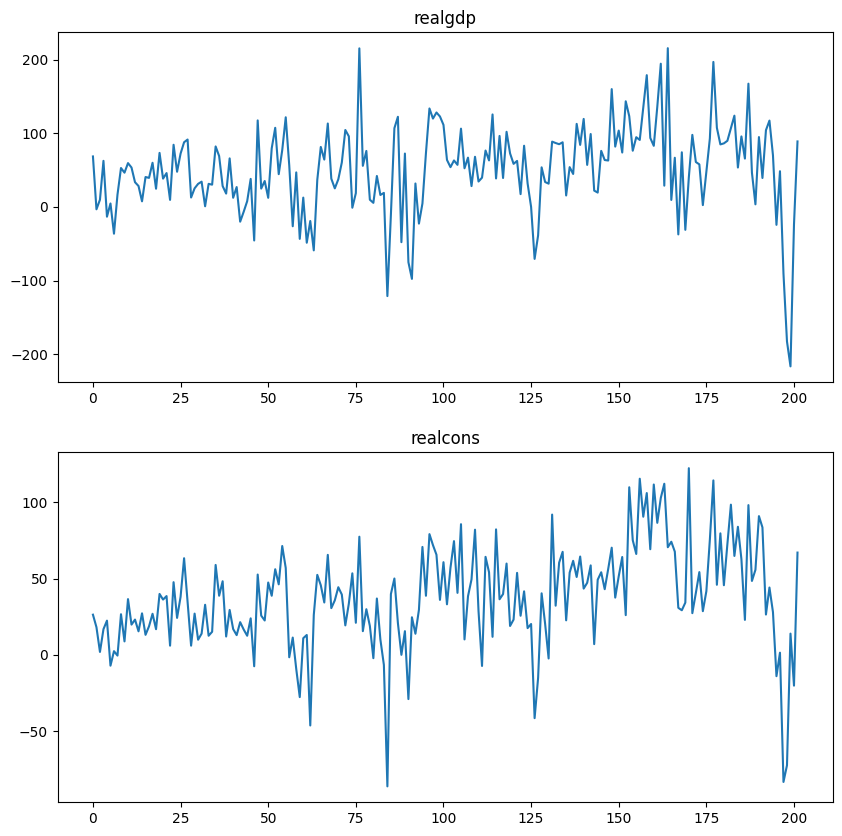

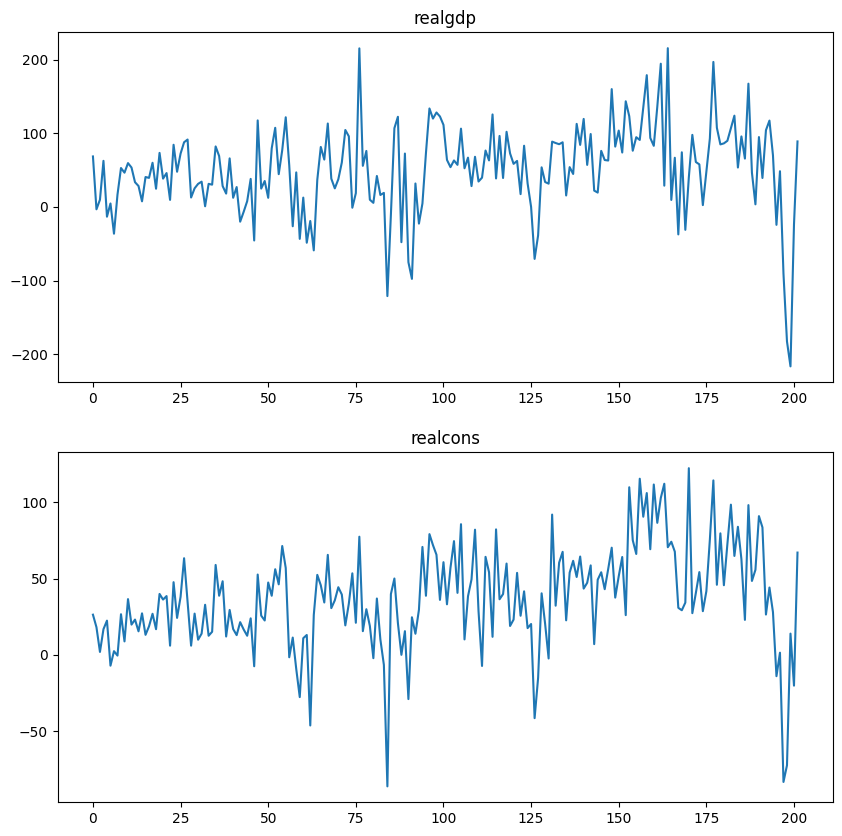

In [176]:
results.plot()

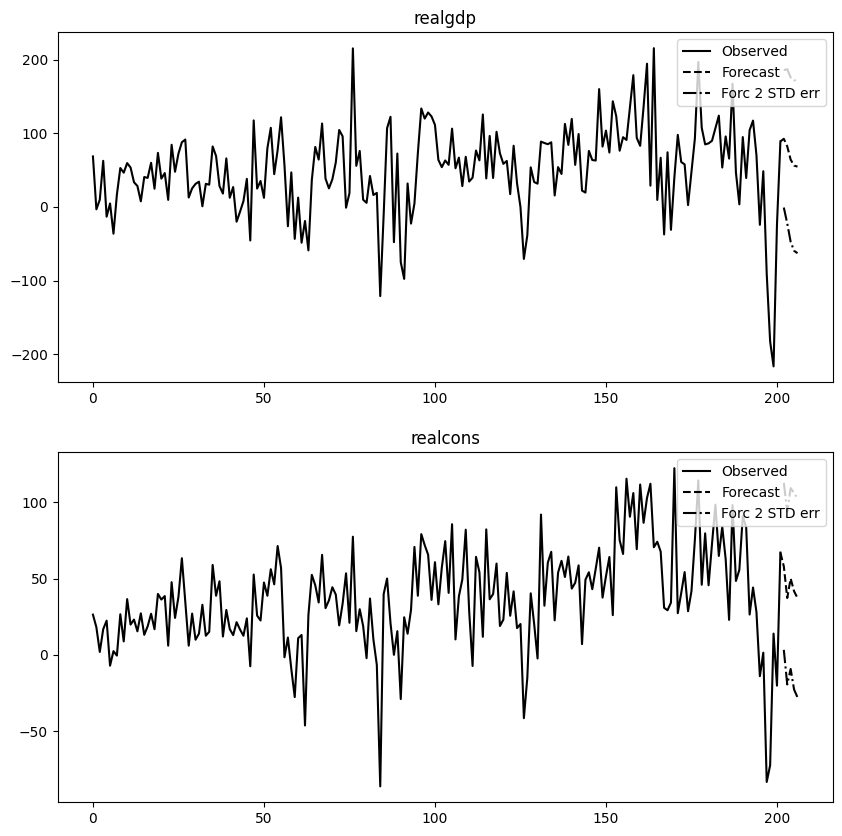

In [178]:
results.plot_forecast(5);


In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
# Hipotesis nula es que no hay cointegracion
# Hipotesis alterna es que si hay cointegracion
#

def cointegration_test(mata, alpha=0.05):
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(mata[["realgdp", "realinv"]],-1,4)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(mata[["realgdp", "realinv"]].columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(mata)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
realgdp ::  37.89     > 12.3212   =>   True
realinv ::  4.55      > 4.1296    =>   True


In [179]:
irf = results.irf(4)

La linea azul muestra cómo una variable afecta a la otra es decir el impacto que tiene por ejemplo consumo sobre el GDP oen la segunda linea el impacto del GDP sobre el consumo

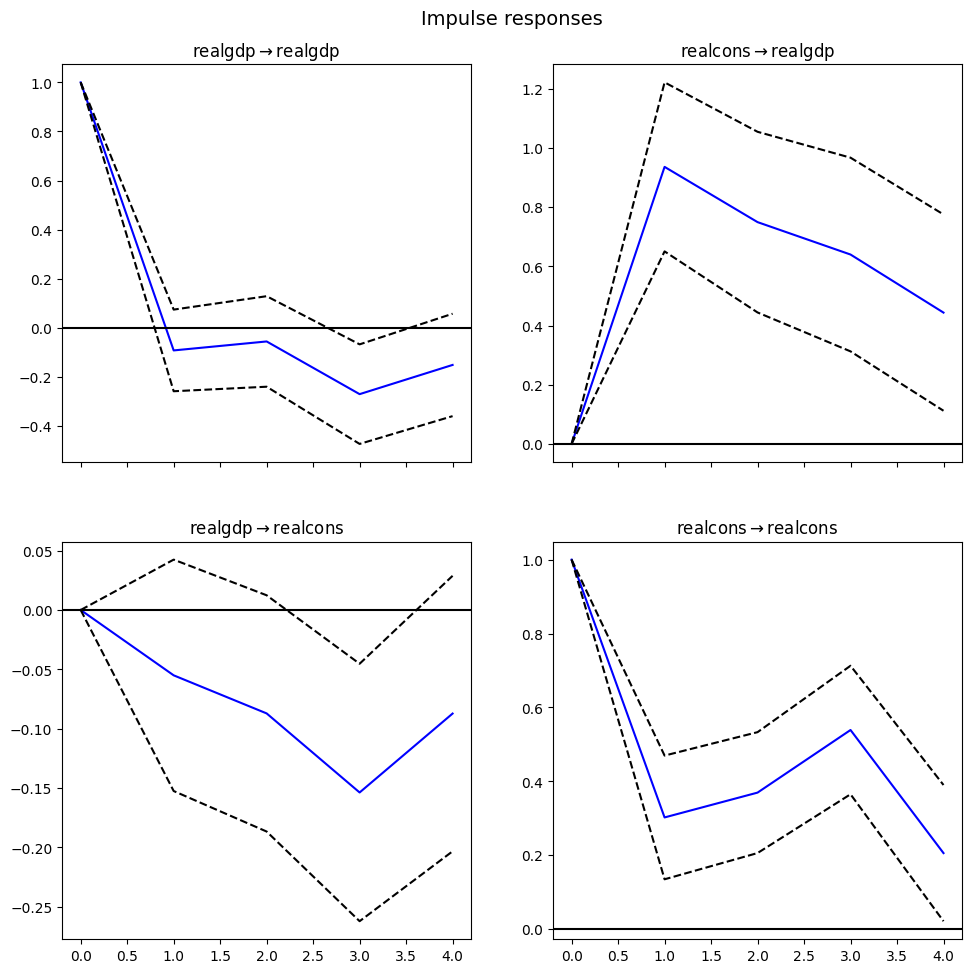

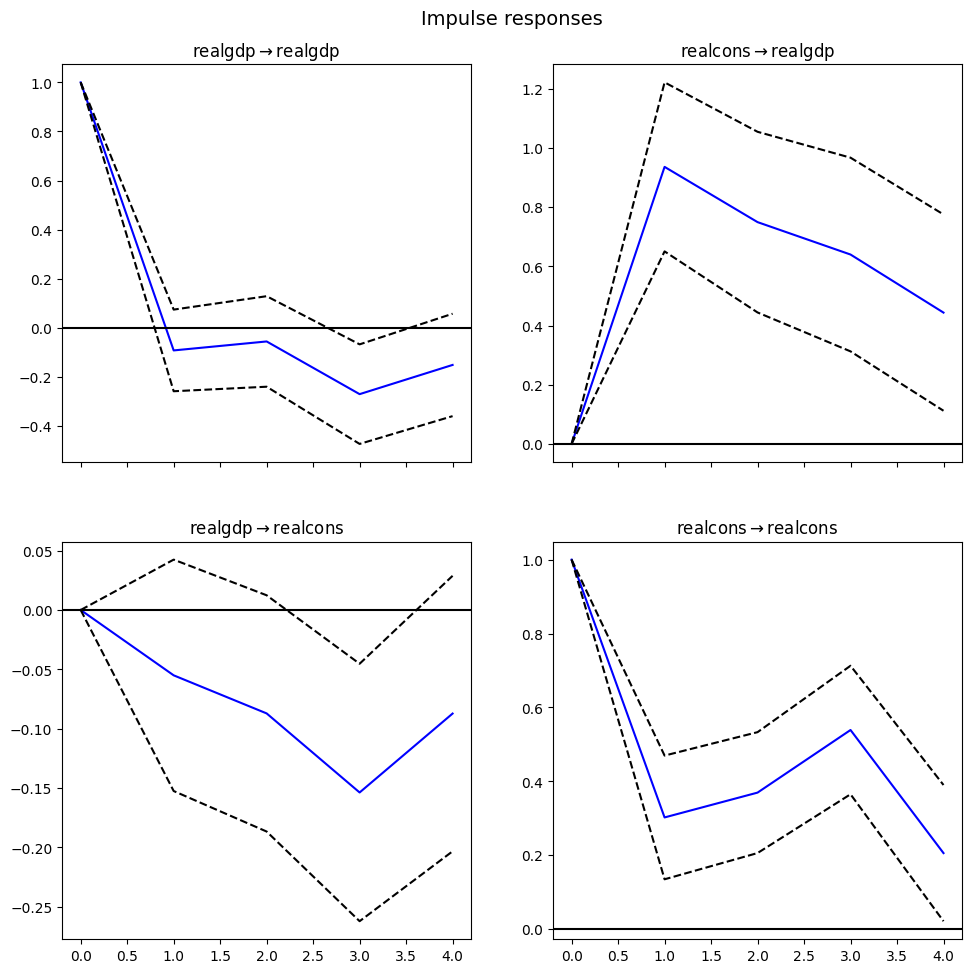

In [180]:
irf.plot(orth=False)

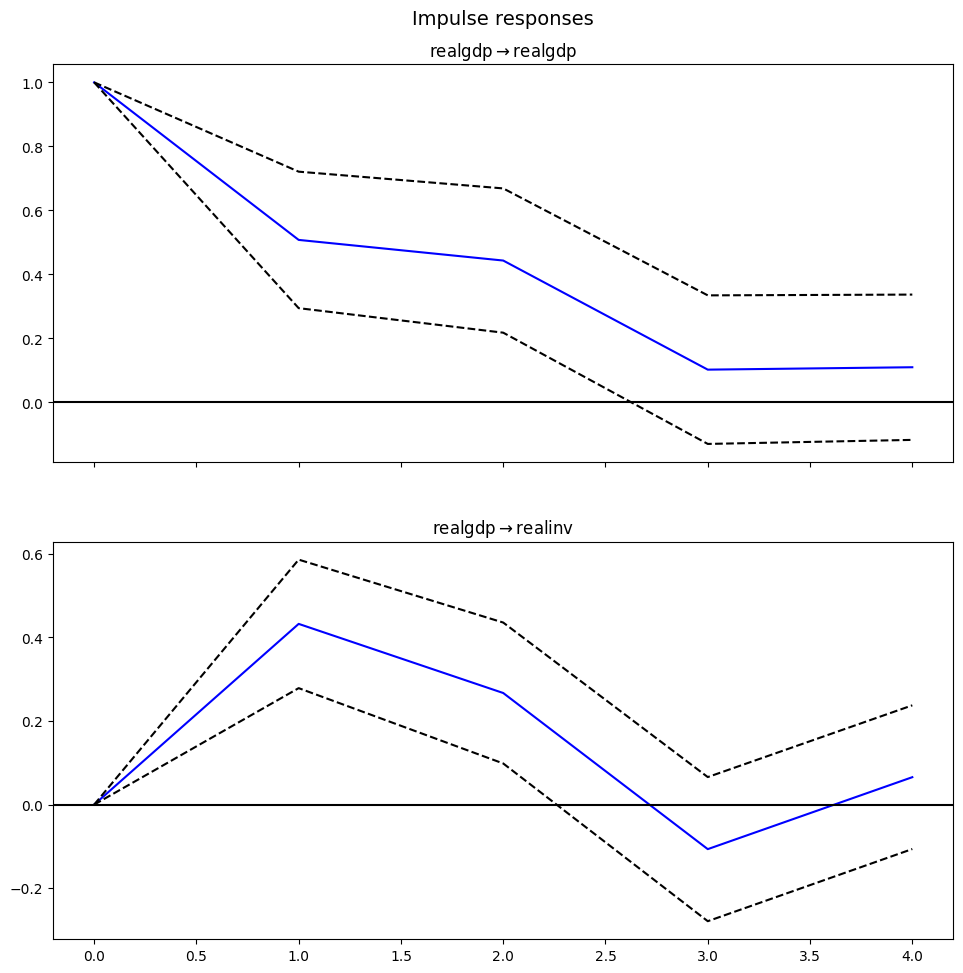

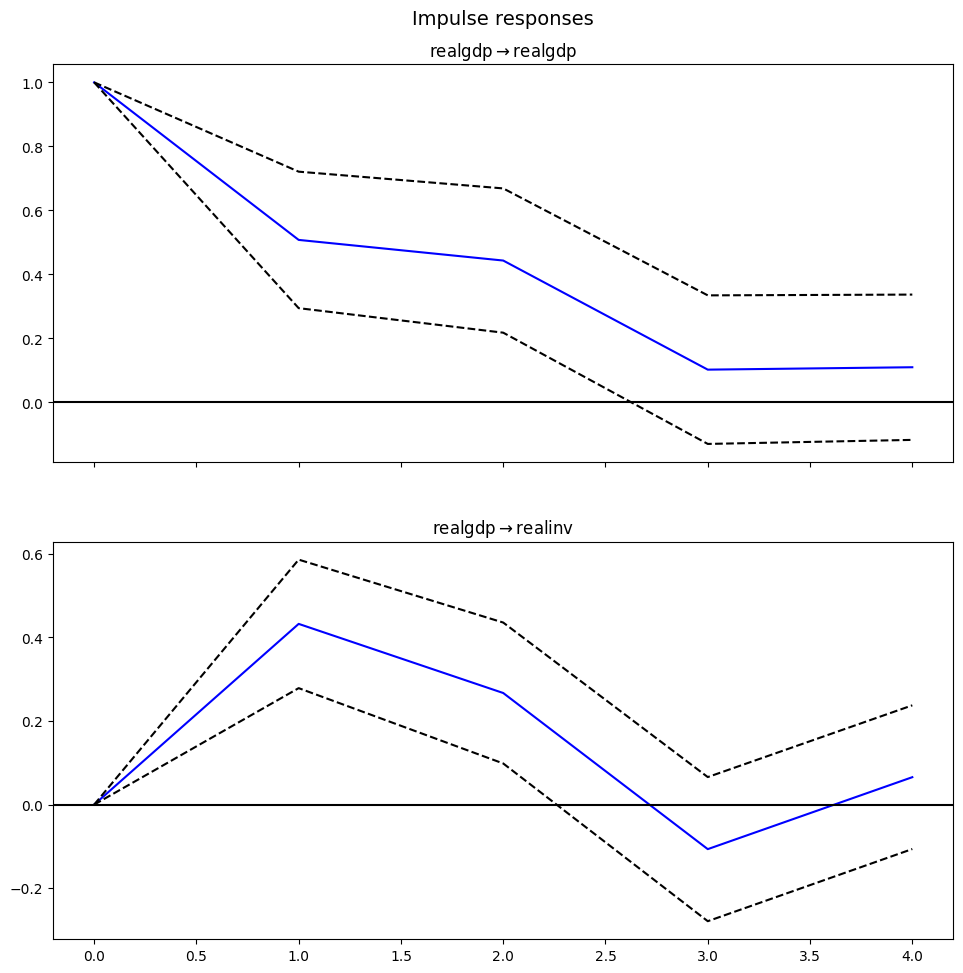

In [ ]:
irf.plot(impulse='realgdp')

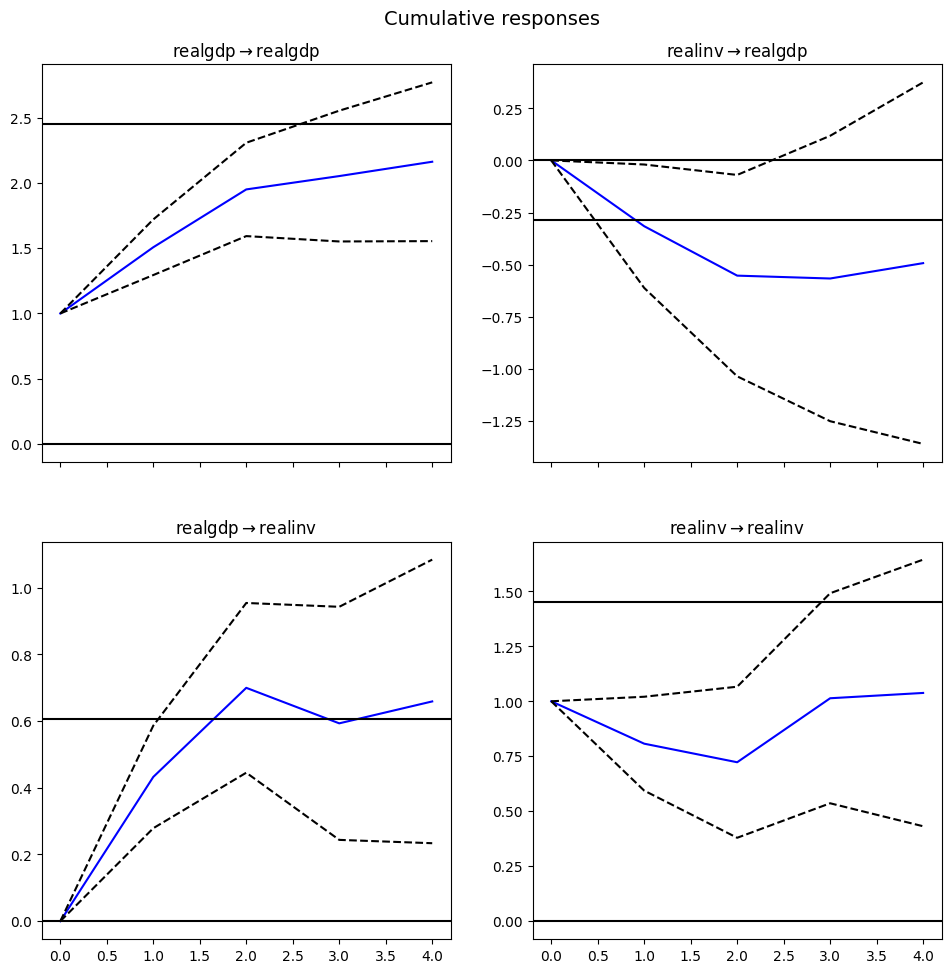

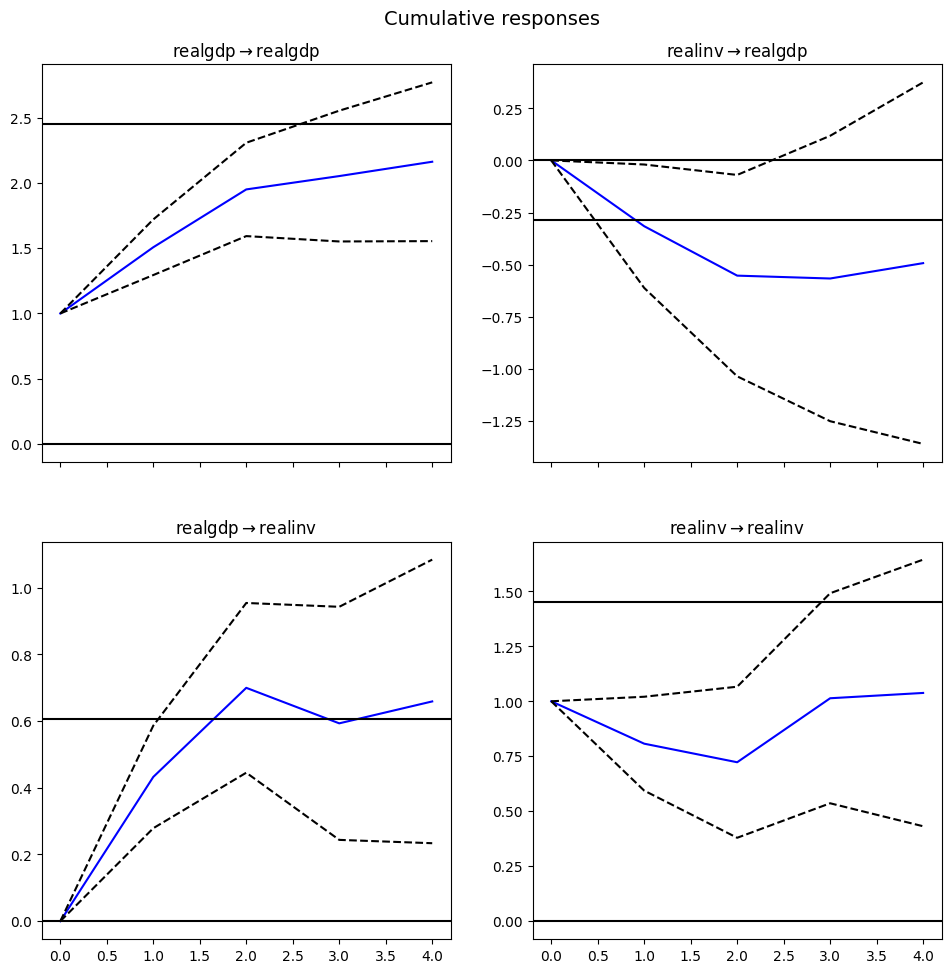

In [ ]:
irf.plot_cum_effects(orth=False)